<a href="https://colab.research.google.com/github/MrPrabhathPeri/Term-Subscription-Prediction-Bank-Dataset/blob/main/Marketing_Campaigns_of_Portuguese_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [36]:
# Assuming you have the dataset as a CSV file
df = pd.read_csv('/content/bank.csv', sep=';')

# View the first few rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [37]:
df = df.dropna()


In [38]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le


In [39]:
scaler = StandardScaler()
features = df.drop('y', axis=1)
target = df['y']
features = scaler.fit_transform(features)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [41]:
# 1. Define the model and parameters to test
model_glm = LogisticRegression(max_iter=1000)
param_grid_glm = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# 2. Set up the grid search
grid_glm = GridSearchCV(estimator=model_glm, param_grid=param_grid_glm, cv=5, n_jobs=-1, verbose=2)

# 3. Run the grid search
grid_glm.fit(X_train, y_train)
y_pred_tuned_glm = grid_glm.predict(X_test)
# 4. Print the best findings
print("Best GLM Parameters:", grid_glm.best_params_)
print("Best GLM Accuracy:", grid_glm.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best GLM Parameters: {'C': 0.01, 'solver': 'saga'}
Best GLM Accuracy: 0.8896949427080209


Confusion Matrix for Tuned GLM Model:


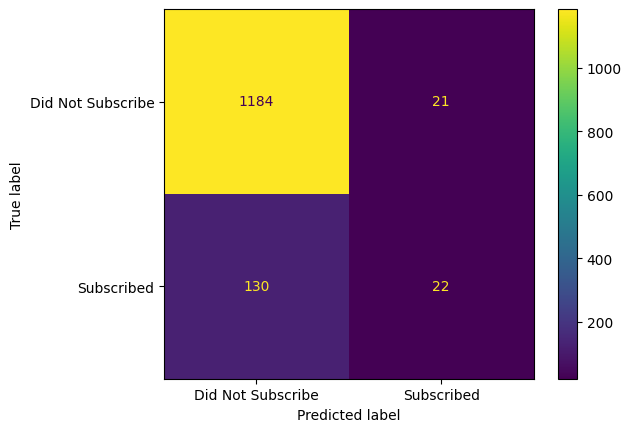

In [42]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned_glm)

# For a better view, display it graphically
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Subscribe', 'Subscribed'])

print("Confusion Matrix for Tuned GLM Model:")
disp.plot()
plt.show()

In [43]:
# 1. Define the model and parameters
model_knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 2. Set up and run the grid search
grid_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_knn.fit(X_train, y_train)
y_pred_tuned_knn = grid_knn.predict(X_test)
# 3. Print the best findings
print("Best k-NN Parameters:", grid_knn.best_params_)
print("Best k-NN Accuracy:", grid_knn.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best k-NN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best k-NN Accuracy: 0.891588677585138


Confusion Matrix for Tuned KNN Model:


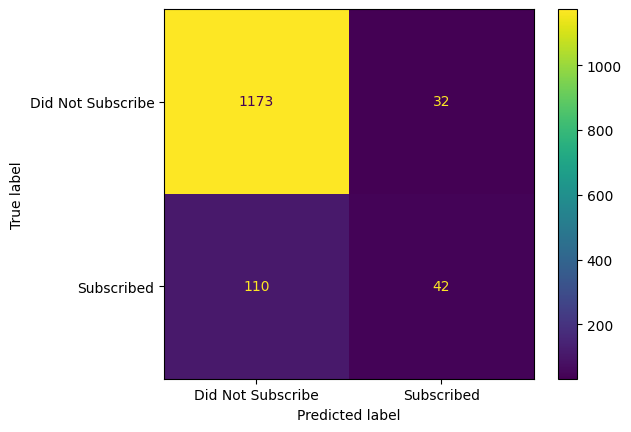

In [44]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned_knn)

# For a better view, display it graphically
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Subscribe', 'Subscribed'])

print("Confusion Matrix for Tuned KNN Model:")
disp.plot()
plt.show()

In [48]:
# 1. Define the model and parameters
model_svm = SVC()
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] # gamma is only for rbf kernel
}

# 2. Set up and run the grid search
grid_svm = GridSearchCV(estimator=model_svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_svm.fit(X_train, y_train)
y_pred_tuned_svm = grid_svm.predict(X_test)

# 3. Print the best findings
print("Best SVM Parameters:", grid_svm.best_params_)
print("Best SVM Accuracy:", grid_svm.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Accuracy: 0.8909592657028016


Confusion Matrix for Tuned SVM Model:


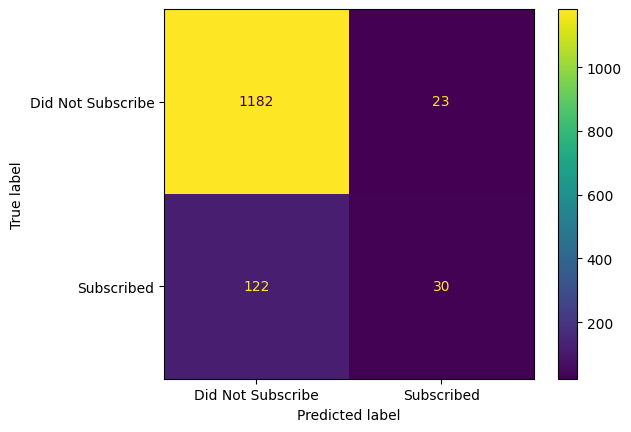

In [49]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned_svm)

# For a better view, display it graphically
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Subscribe', 'Subscribed'])

print("Confusion Matrix for Tuned SVM Model:")
disp.plot()
plt.show()

In [50]:
# 1. Define the model and parameters
model_gbm = GradientBoostingClassifier()
param_grid_gbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# 2. Set up and run the grid search
grid_gbm = GridSearchCV(estimator=model_gbm, param_grid=param_grid_gbm, cv=5, n_jobs=-1, verbose=2)
grid_gbm.fit(X_train, y_train)
y_pred_tuned_gbm = grid_gbm.predict(X_test)

# 3. Print the best findings
print("Best GBM Parameters:", grid_gbm.best_params_)
print("Best GBM Accuracy:", grid_gbm.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best GBM Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100}
Best GBM Accuracy: 0.8972773811666366


Confusion Matrix for Tuned GBM Model:


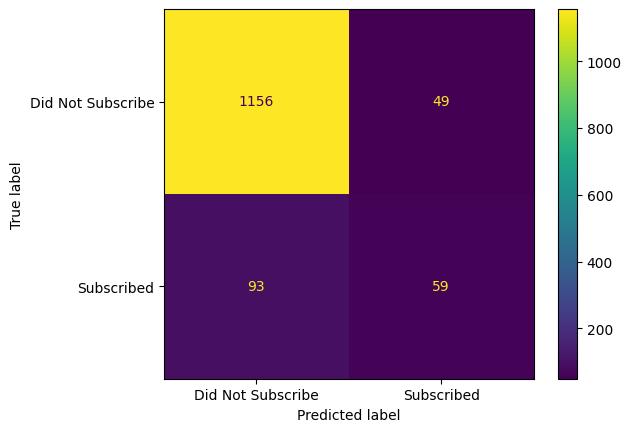

In [51]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned_gbm)

# For a better view, display it graphically
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did Not Subscribe', 'Subscribed'])

print("Confusion Matrix for Tuned GBM Model:")
disp.plot()
plt.show()

In [53]:
# For example, evaluating the GBM model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_glm))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned_glm))

Confusion Matrix:
 [[1184   21]
 [ 130   22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1205
           1       0.51      0.14      0.23       152

    accuracy                           0.89      1357
   macro avg       0.71      0.56      0.58      1357
weighted avg       0.86      0.89      0.86      1357



In [54]:
# For example, evaluating the GBM model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned_knn))

Confusion Matrix:
 [[1173   32]
 [ 110   42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      1205
           1       0.57      0.28      0.37       152

    accuracy                           0.90      1357
   macro avg       0.74      0.62      0.66      1357
weighted avg       0.88      0.90      0.88      1357



In [55]:
# For example, evaluating the GBM model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned_svm))

Confusion Matrix:
 [[1182   23]
 [ 122   30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.57      0.20      0.29       152

    accuracy                           0.89      1357
   macro avg       0.74      0.59      0.62      1357
weighted avg       0.87      0.89      0.87      1357



In [52]:
# For example, evaluating the GBM model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned_gbm))
print("Classification Report:\n", classification_report(y_test, y_pred_tuned_gbm))

Confusion Matrix:
 [[1156   49]
 [  93   59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      1205
           1       0.55      0.39      0.45       152

    accuracy                           0.90      1357
   macro avg       0.74      0.67      0.70      1357
weighted avg       0.88      0.90      0.89      1357



In [74]:
mean_scores = {}

scores_glm = cross_val_score(model_glm, features, target, cv=10)
mean_scores["GLM"] = scores_glm.mean()
print("GLM Cross-Validation Score:", scores_glm.mean())

scores_knn = cross_val_score(model_knn, features, target, cv=10)
mean_scores["KNN"] = scores_knn.mean()
print("KNN Cross-Validation Score:", scores_knn.mean())

scores_svm = cross_val_score(model_svm, features, target, cv=10)
mean_scores["SVM"] = scores_svm.mean()
print("SVM Cross-Validation Score:", scores_svm.mean())

scores_gbm = cross_val_score(model_gbm, features, target, cv=10)
mean_scores["GBM"] = scores_gbm.mean()
print("GBM Cross-Validation Score:", scores_gbm.mean())

best_model_score = max(mean_scores, key=mean_scores.get)

print("\n-----RESULTS-----")
print(f"The best model is {best_model_score} with a score of {mean_scores[best_model_score]}")


GLM Cross-Validation Score: 0.8887441637851883
KNN Cross-Validation Score: 0.8925013186426772
SVM Cross-Validation Score: 0.891839066987048
GBM Cross-Validation Score: 0.8958233214167105

-----RESULTS-----
The best model is GBM with a score of 0.8958233214167105
